In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("RELIANCE.NS.csv")
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2009,287.946228,297.135284,286.186127,294.049408,261.684845,21707030.0
1,05-01-2009,296.929535,314.759033,296.038086,312.210327,277.846893,24091750.0
2,06-01-2009,310.873108,317.730621,304.301361,313.364685,278.874176,26378143.0
3,07-01-2009,312.930359,316.816284,268.585236,274.471252,244.261612,37187994.0
4,09-01-2009,276.585632,276.585632,249.989990,263.613556,234.598953,41508434.0
5,12-01-2009,260.516235,261.727753,248.012756,250.961472,223.339371,32218398.0
6,13-01-2009,250.230011,261.956329,243.441086,246.309799,219.199707,28787074.0
7,14-01-2009,249.407104,278.414307,249.407104,269.670990,239.989639,28656487.0
8,15-01-2009,260.996277,265.145050,253.155869,261.121979,232.381561,27446162.0
9,16-01-2009,263.099243,281.385895,260.561951,278.265747,247.638382,29143981.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763 entries, 0 to 3762
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3763 non-null   object 
 1   Open       3756 non-null   float64
 2   High       3756 non-null   float64
 3   Low        3756 non-null   float64
 4   Close      3756 non-null   float64
 5   Adj Close  3756 non-null   float64
 6   Volume     3756 non-null   float64
dtypes: float64(6), object(1)
memory usage: 205.9+ KB


In [4]:
df1 = data.dropna()
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
# df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d')

In [5]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,287.946228,297.135284,286.186127,294.049408,261.684845,21707030.0
1,2009-01-05,296.929535,314.759033,296.038086,312.210327,277.846893,24091750.0
2,2009-01-06,310.873108,317.730621,304.301361,313.364685,278.874176,26378143.0
3,2009-01-07,312.930359,316.816284,268.585236,274.471252,244.261612,37187994.0
4,2009-01-09,276.585632,276.585632,249.989990,263.613556,234.598953,41508434.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 3762
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3756 non-null   datetime64[ns]
 1   Open       3756 non-null   float64       
 2   High       3756 non-null   float64       
 3   Low        3756 non-null   float64       
 4   Close      3756 non-null   float64       
 5   Adj Close  3756 non-null   float64       
 6   Volume     3756 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 234.8 KB


In [7]:
# install neuralprophet
!pip install neuralprophet

#  import neuralprophet
from neuralprophet import NeuralProphet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

ERROR:NP.plotting:Importing matplotlib failed. Plotting will not work.
ERROR:NP.plotting:Importing matplotlib failed. Plotting will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [8]:
df2 = df1[['Date','Adj Close']]

# change names to fit NeuralProphet req
reliance_features = df2.rename(columns = {"Date":"ds","Adj Close":"y"})
reliance_features.head(10)

,ds,y
0,2009-01-02,261.684845
1,2009-01-05,277.846893
2,2009-01-06,278.874176
3,2009-01-07,244.261612
4,2009-01-09,234.598953
5,2009-01-12,223.339371
6,2009-01-13,219.199707
7,2009-01-14,239.989639
8,2009-01-15,232.381561
9,2009-01-16,247.638382


In [38]:
# Calculate the index for splitting the data (80-20)
split_index = int(len(reliance_features) * 0.8)

# split_index = int(len(reliance_features) * 0.7)

# Split data into training (80%) and testing (20%) sets
train_data = reliance_features.iloc[:split_index]
test_data = reliance_features.iloc[split_index:]

# Separate features and target variable for training and testing sets
X_train = train_data[['ds']]
y_train = train_data['y']
X_test = test_data[['ds']]
y_test = test_data['y']

# Train the NeuralProphet model on the training data
model1 = NeuralProphet()

# Add custom seasonality component
model1.add_country_holidays(country_name='IN')

metrics = model1.fit(train_data, freq='D', epochs=500, learning_rate=0.01)

# Make predictions for the testing data
forecast_test = model1.predict(test_data)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.774% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO:NP.config:Auto-set batch_size to 

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.415% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.415% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.415% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.415% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 47it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [39]:
# # Make predictions
# future = model1.make_future_dataframe(reliance_features, periods=30)  # Example: Forecasting for the next 30 days
# forecast1 = model1.predict(future)

In [40]:
fig_forecast = model1.plot(forecast_test)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [41]:
#plot
fig_forecast

In [42]:
# Obtain actual values from the training data
actual_train = train_data['y']

# Make predictions for the training data
forecast_train = model1.predict(train_data)

# Extract predicted values from the forecast
predicted_train = forecast_train['yhat1']

# Calculate residuals
residuals_train = actual_train - predicted_train

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.774% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 94.774% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 94.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 47it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [43]:
model1.plot(forecast_train)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 


In [44]:
residuals_train.head()

0   -39.641876
1   -24.209442
2   -22.919464
3     8.494354
4   -63.931443
dtype: float64

In [45]:
residuals_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3011 entries, 0 to 3010
Series name: None
Non-Null Count  Dtype  
--------------  -----  
2997 non-null   float64
dtypes: float64(1)
memory usage: 47.0 KB


In [46]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Handle NaN values using forward fill
residuals_array = residuals_train.fillna(method='ffill').values

# Reshape the array to have a single feature
residuals_array = residuals_array.reshape(-1, 1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals_array)

# Define a function to create input-output pairs for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # Define the number of time steps
X_lstm_train, y_lstm_train = create_dataset(residuals_scaled, time_steps)

# Define the LSTM model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, return_sequences=True, input_shape=(X_lstm_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=100, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=100))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

# Compile the model
optimizer = Adam(lr=0.001)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error')

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
model_lstm.fit(X_lstm_train, y_lstm_train, epochs=200, batch_size=32, callbacks=[reduce_lr])

Epoch 1/200
94/94 [==============================] - 9s 27ms/step - loss: 0.0171 - lr: 0.0010
Epoch 2/200
94/94 [==============================] - 3s 30ms/step - loss: 0.0033 - lr: 0.0010
Epoch 3/200
94/94 [==============================] - 6s 66ms/step - loss: 0.0026 - lr: 0.0010
Epoch 4/200
94/94 [==============================] - 4s 40ms/step - loss: 0.0026 - lr: 0.0010
Epoch 5/200
94/94 [==============================] - 3s 28ms/step - loss: 0.0025 - lr: 0.0010
Epoch 6/200
94/94 [==============================] - 3s 28ms/step - loss: 0.0025 - lr: 0.0010
Epoch 7/200
94/94 [==============================] - 4s 38ms/step - loss: 0.0024 - lr: 0.0010
Epoch 8/200
94/94 [==============================] - 3s 27ms/step - loss: 0.0022 - lr: 0.0010
Epoch 9/200
94/94 [==============================] - 3s 28ms/step - loss: 0.0025 - lr: 0.0010
Epoch 10/200
94/94 [==============================] - 3s 28ms/step - loss: 0.0021 - lr: 0.0010
Epoch 11/200
94/94 [==============================] - 3s 34

In [47]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 100)           40800     
                                                                 
 dropout_2 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_3 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [48]:
# Initialize an empty list to store predictions
predictions_lstm = []

# Reshape the residuals for prediction
X_lstm_test = np.reshape(residuals_scaled[-time_steps:], (1, time_steps, 1))

# Calculate the index where the 20% split occurs
# split_index = int(len(residuals_scaled) * 0.8)

# Iterate over the remaining 20% of the dataset
for i in range(len(test_data)):
    # Make predictions for the current input
    prediction = model_lstm.predict(X_lstm_test)
    # Store the prediction
    predictions_lstm.append(prediction[0, 0])
    # Append the new prediction to the input sequence
    X_lstm_test = np.concatenate((X_lstm_test[:, 1:, :], prediction.reshape(1, 1, 1)), axis=1)

# Convert the predictions list to a NumPy array
predictions_lstm = np.array(predictions_lstm)

1/1 [==============================] - 0s 29ms/step


In [50]:
predictions_lstm = scaler.inverse_transform(predictions_lstm.reshape(-1, 1)).flatten() #to bring back to original scale

In [51]:
predictions_lstm[:]

array([ 1.43915695e+02,  1.40546173e+02,  1.37274536e+02,  1.34228912e+02,
        1.31444824e+02,  1.28855789e+02,  1.26395546e+02,  1.24013069e+02,
        1.21673012e+02,  1.19352753e+02,  1.17041039e+02,  1.14748604e+02,
        1.12481941e+02,  1.10246643e+02,  1.08046120e+02,  1.05881386e+02,
        1.03751686e+02,  1.01655922e+02,  9.95924149e+01,  9.75600815e+01,
        9.55579529e+01,  9.35852585e+01,  9.16414871e+01,  8.97261276e+01,
        8.78388519e+01,  8.59791412e+01,  8.41465607e+01,  8.23406448e+01,
        8.05608902e+01,  7.88067856e+01,  7.70779953e+01,  7.53740768e+01,
        7.36945877e+01,  7.20388718e+01,  7.04068069e+01,  6.87980118e+01,
        6.72118378e+01,  6.56481552e+01,  6.41065216e+01,  6.25864792e+01,
        6.10876503e+01,  5.96098976e+01,  5.81527748e+01,  5.67159004e+01,
        5.52989464e+01,  5.39015961e+01,  5.25236588e+01,  5.11646118e+01,
        4.98243332e+01,  4.85024986e+01,  4.71987915e+01,  4.59128838e+01,
        4.46445885e+01,  

In [52]:
forecast_test.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly,events_additive,event_Christmas Day,event_Day of Ashura (estimated),event_Diwali,...,event_Feast of Pentecost,event_Gandhi Jayanti,event_Good Friday,event_Holi,event_Independence Day,event_Labour Day,event_Makar Sankranti / Pongal,event_Mawlid (estimated),event_Palm Sunday,event_Republic Day
747,2024-03-20,2887.500000,2768.037109,2816.352539,-47.531586,-0.783932,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
748,2024-03-21,2901.949951,2768.986084,2817.261230,-48.016254,-0.258881,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,2024-03-22,2910.050049,2768.631836,2818.169922,-48.415749,-1.122285,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
750,2024-03-26,2883.149902,2773.945801,2821.805176,-49.119015,1.259755,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
751,2024-03-27,2985.699951,2772.973145,2822.714111,-49.071850,-0.669360,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Convert predictions_lstm array to a DataFrame with the same index as forecast_test
predictions_lstm_df = pd.DataFrame(predictions_lstm, index=forecast_test.index, columns=['predicted_residuals'])

# Combine the predictions_lstm with the forecast_test from NeuralProphet
combined_forecast = forecast_test.copy()  # Make a copy of forecast_test
combined_forecast['yhat_combined'] = forecast_test['yhat1'] + predictions_lstm_df['predicted_residuals']

In [29]:
# # Another method of combining the predictions of NP with the residual predictions of LSTM
# predictions_lstm_df = pd.DataFrame(predictions_lstm, index=forecast_test.index, columns=['predicted_residuals'])

# # Normalize the residuals
# residuals_mean = predictions_lstm_df['predicted_residuals'].mean()
# residuals_std = predictions_lstm_df['predicted_residuals'].std()
# normalized_residuals = (predictions_lstm_df['predicted_residuals'] - residuals_mean) / residuals_std

# # Combine the normalized residuals with the predictions from NeuralProphet
# combined_forecast = forecast_test.copy()  # Make a copy of forecast_test
# combined_forecast['yhat_combined'] = forecast_test['yhat1'] + normalized_residuals

In [54]:
predictions_lstm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   predicted_residuals  752 non-null    float32
dtypes: float32(1)
memory usage: 3.1 KB


In [55]:
combined_forecast.head()

,ds,y,yhat1,trend,season_yearly,season_weekly,events_additive,event_Christmas Day,event_Day of Ashura (estimated),event_Diwali,...,event_Gandhi Jayanti,event_Good Friday,event_Holi,event_Independence Day,event_Labour Day,event_Makar Sankranti / Pongal,event_Mawlid (estimated),event_Palm Sunday,event_Republic Day,yhat_combined
0,2021-03-12,1952.857056,1771.215820,1813.030640,-40.603111,-1.211640,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1915.131470
1,2021-03-15,1926.637451,1772.935303,1815.757202,-43.659523,0.837551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1913.481445
2,2021-03-16,1919.054810,1773.239990,1816.665894,-44.553539,1.127654,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1910.514526
3,2021-03-17,1877.715576,1771.415039,1817.574951,-45.380287,-0.779700,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1905.643921
4,2021-03-18,1835.462769,1772.264404,1818.484009,-46.132046,-0.087492,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1903.709229


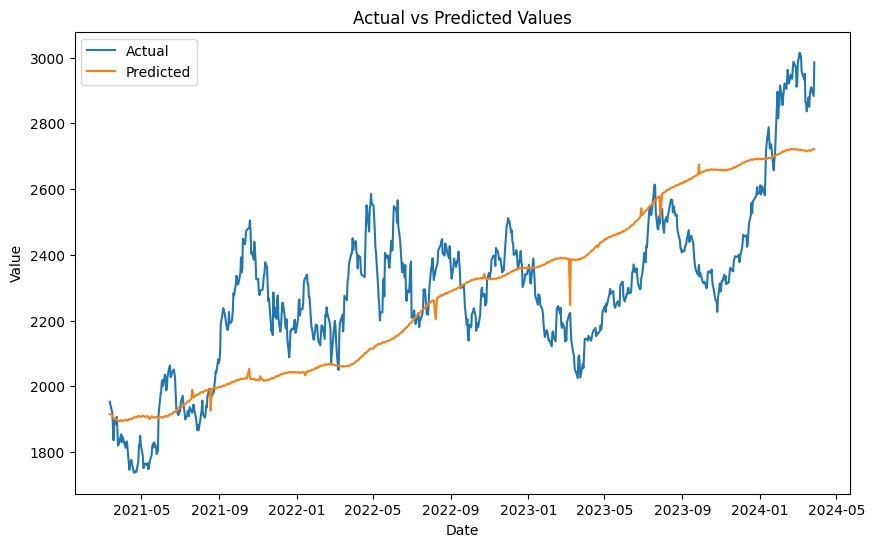

In [56]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(combined_forecast['ds'], combined_forecast['y'], label='Actual')
plt.plot(combined_forecast['ds'], combined_forecast['yhat_combined'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


## Evaluation


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate MAE
mae = mean_absolute_error(combined_forecast['y'], combined_forecast['yhat_combined'])

# Calculate MSE
mse = mean_squared_error(combined_forecast['y'], combined_forecast['yhat_combined'])

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = mean_absolute_percentage_error(combined_forecast['y'], combined_forecast['yhat_combined'])

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 165.42151205171623
Mean Squared Error (MSE): 39239.77552196238
Root Mean Squared Error (RMSE): 198.09032162617734
Mean Absolute Percentage Error (MAPE): 0.07161439319580666


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract actual, NeuralProphet, and hybrid combined predictions
actual_values = combined_forecast['y']
neural_prophet_predictions = forecast_test['yhat1']
hybrid_combined_predictions = combined_forecast['yhat_combined']

# Calculate evaluation metrics for NeuralProphet predictions
mae_np = mean_absolute_error(actual_values, neural_prophet_predictions)
mse_np = mean_squared_error(actual_values, neural_prophet_predictions)
rmse_np = np.sqrt(mse_np)
mape_np = np.mean(np.abs((actual_values - neural_prophet_predictions) / actual_values)) * 100

# Calculate evaluation metrics for hybrid combined predictions
mae_hybrid = mean_absolute_error(actual_values, hybrid_combined_predictions)
mse_hybrid = mean_squared_error(actual_values, hybrid_combined_predictions)
rmse_hybrid = np.sqrt(mse_hybrid)
mape_hybrid = np.mean(np.abs((actual_values - hybrid_combined_predictions) / actual_values)) * 100

# Print the evaluation metrics
print("NeuralProphet Results:")
print(f"Mean Absolute Error (MAE): {mae_np}")
print(f"Mean Squared Error (MSE): {mse_np}")
print(f"Root Mean Squared Error (RMSE): {rmse_np}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_np}%\n")

print("Hybrid Combined Results:")
print(f"Mean Absolute Error (MAE): {mae_hybrid}")
print(f"Mean Squared Error (MSE): {mse_hybrid}")
print(f"Root Mean Squared Error (RMSE): {rmse_hybrid}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_hybrid}%")

NeuralProphet Results:
Mean Absolute Error (MAE): 168.03917988436046
Mean Squared Error (MSE): 41620.72778260956
Root Mean Squared Error (RMSE): 204.0115873733881
Mean Absolute Percentage Error (MAPE): 7.282496471524104%

Hybrid Combined Results:
Mean Absolute Error (MAE): 165.42151205171623
Mean Squared Error (MSE): 39239.77552196238
Root Mean Squared Error (RMSE): 198.09032162617734
Mean Absolute Percentage Error (MAPE): 7.1614393195806665%


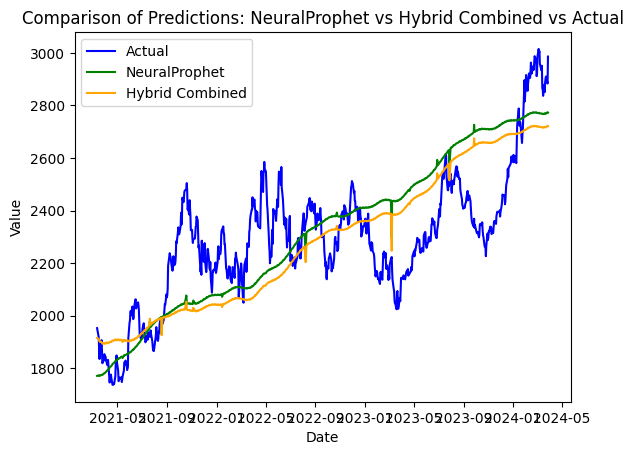

In [59]:
# Plot actual values
plt.plot(combined_forecast['ds'], actual_values, label='Actual', color='blue')

# Plot NeuralProphet predictions
plt.plot(forecast_test['ds'], neural_prophet_predictions, label='NeuralProphet', color='green')

# Plot hybrid combined predictions
plt.plot(combined_forecast['ds'], hybrid_combined_predictions, label='Hybrid Combined', color='orange')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Predictions: NeuralProphet vs Hybrid Combined vs Actual')
plt.legend()
plt.show()

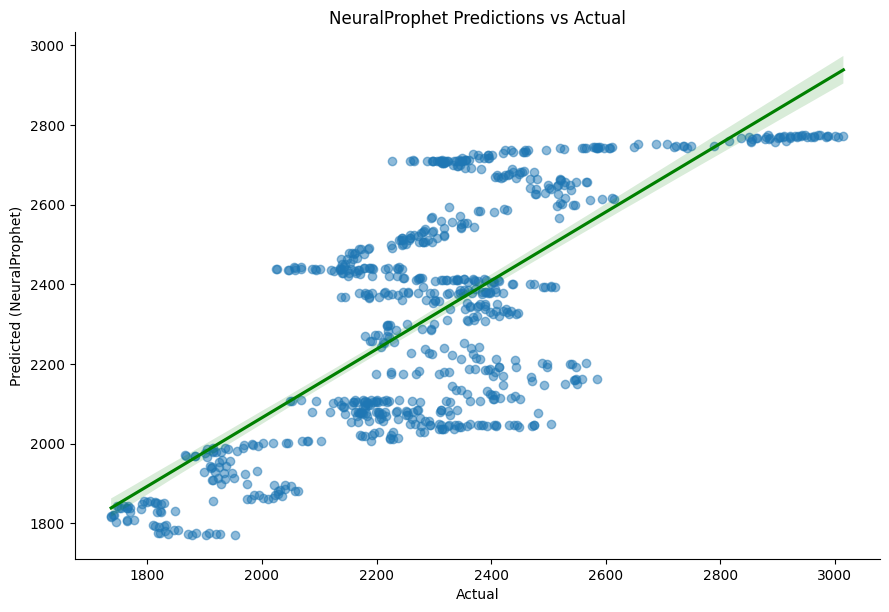

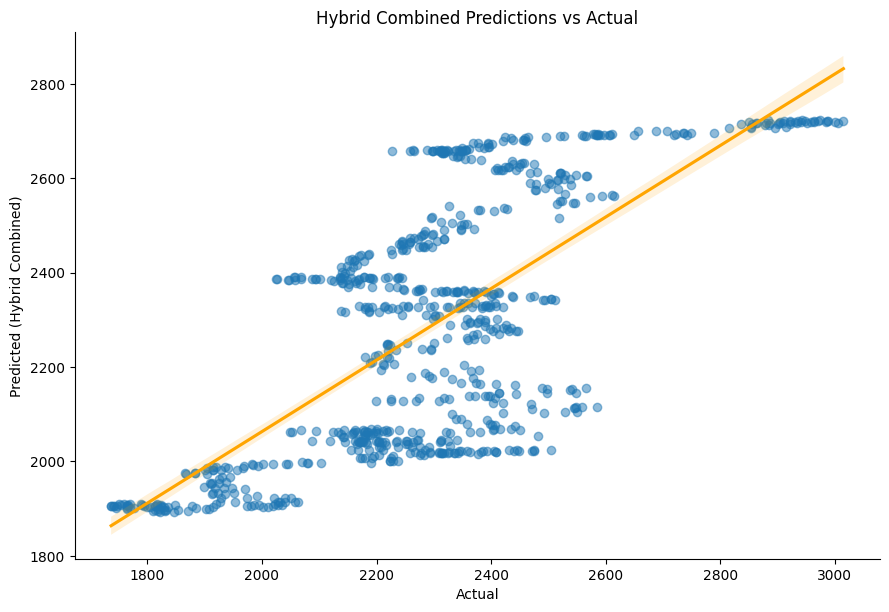

In [60]:
import seaborn as sns

# Create a DataFrame for comparison
comparison_data = pd.DataFrame({
    'Actual': actual_values,
    'NeuralProphet': neural_prophet_predictions,
    'Hybrid Combined': hybrid_combined_predictions
})

# Plot a scatter plot with line of best fit for NeuralProphet predictions
sns.lmplot(x='Actual', y='NeuralProphet', data=comparison_data, scatter_kws={'alpha':0.5}, line_kws={'color': 'green'}, height=6, aspect=1.5)
plt.title('NeuralProphet Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted (NeuralProphet)')
plt.show()

# Plot a scatter plot with line of best fit for hybrid combined predictions
sns.lmplot(x='Actual', y='Hybrid Combined', data=comparison_data, scatter_kws={'alpha':0.5}, line_kws={'color': 'orange'}, height=6, aspect=1.5)
plt.title('Hybrid Combined Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted (Hybrid Combined)')
plt.show()

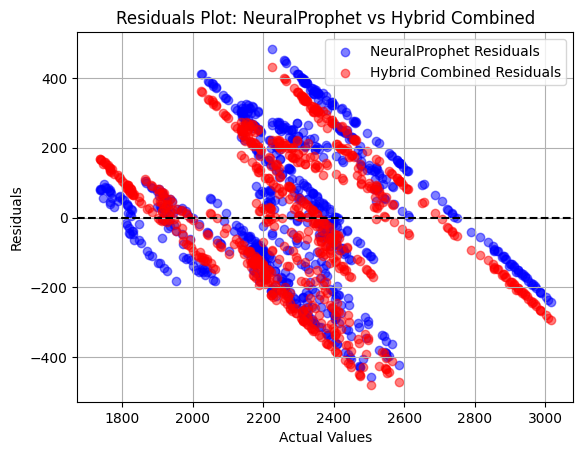

In [61]:
# Calculate residuals for NeuralProphet and hybrid combined predictions
residuals_np = neural_prophet_predictions - actual_values
residuals_hybrid = hybrid_combined_predictions - actual_values

# Plot residuals for NeuralProphet
plt.scatter(actual_values, residuals_np, color='blue', label='NeuralProphet Residuals', alpha=0.5)
# Plot residuals for hybrid combined model
plt.scatter(actual_values, residuals_hybrid, color='red', label='Hybrid Combined Residuals', alpha=0.5)

plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0 for reference

plt.title('Residuals Plot: NeuralProphet vs Hybrid Combined')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()